In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=';')

In [4]:
print(red_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
red_wine["Quality_binary"] = np.where(red_wine['quality'] >= 6, 1, 0)

In [6]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality_binary
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [7]:
Q1 = red_wine['quality'].quantile(0.25)
Q3 = red_wine['quality'].quantile(0.75)
print("Q1", Q1, "Q3", Q3, sep="\n")

Q1
5.0
Q3
6.0


In [9]:
IQR = Q3 - Q1
IQR

1.0

In [11]:
emissions = red_wine[(red_wine['quality'] < (Q1 - 1.5 * IQR)) | (red_wine['quality'] > (Q3 + 1.5 * IQR))]
print("Выбросов: ", len(emissions))

Выбросов:  28


In [12]:
red_wine_no_emissions = red_wine[~((red_wine['quality'] < (Q1 - 1.5 * IQR)) | (red_wine['quality'] > (Q3 + 1.5 * IQR)))]

In [13]:
red_wine_no_emissions

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality_binary
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


/var/folders/qd/6k36r34j1wv5pft80r8s0nvc0000gq/T/ipykernel_66149/4074408997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_no_emissions['quality'])


<AxesSubplot: xlabel='quality', ylabel='Density'>

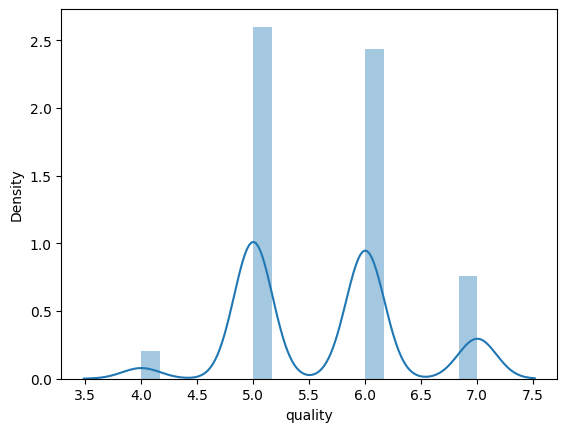

In [14]:
sns.distplot(red_wine_no_emissions['quality'])

<AxesSubplot: xlabel='Quality_binary', ylabel='count'>

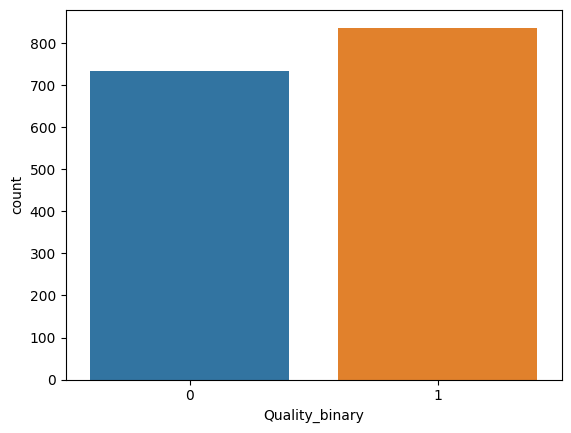

In [15]:
sns.countplot(x='Quality_binary', data=red_wine_no_emissions)

In [16]:
median_value = red_wine_no_emissions.median()

In [25]:
print("Медианные значения \n", median_value)

Медианные значения 
 fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
Quality_binary           1.00000
dtype: float64


<AxesSubplot: xlabel='quality'>

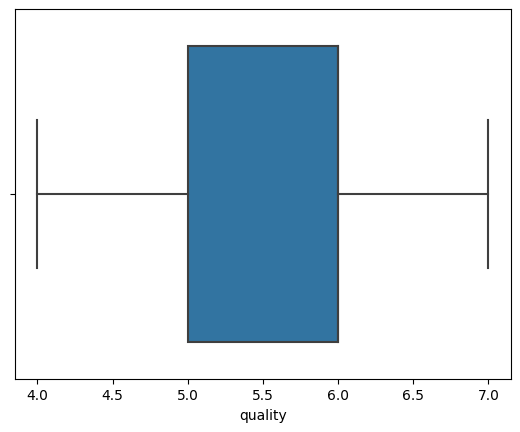

In [29]:
sns.boxplot(x=red_wine_no_emissions['quality'])

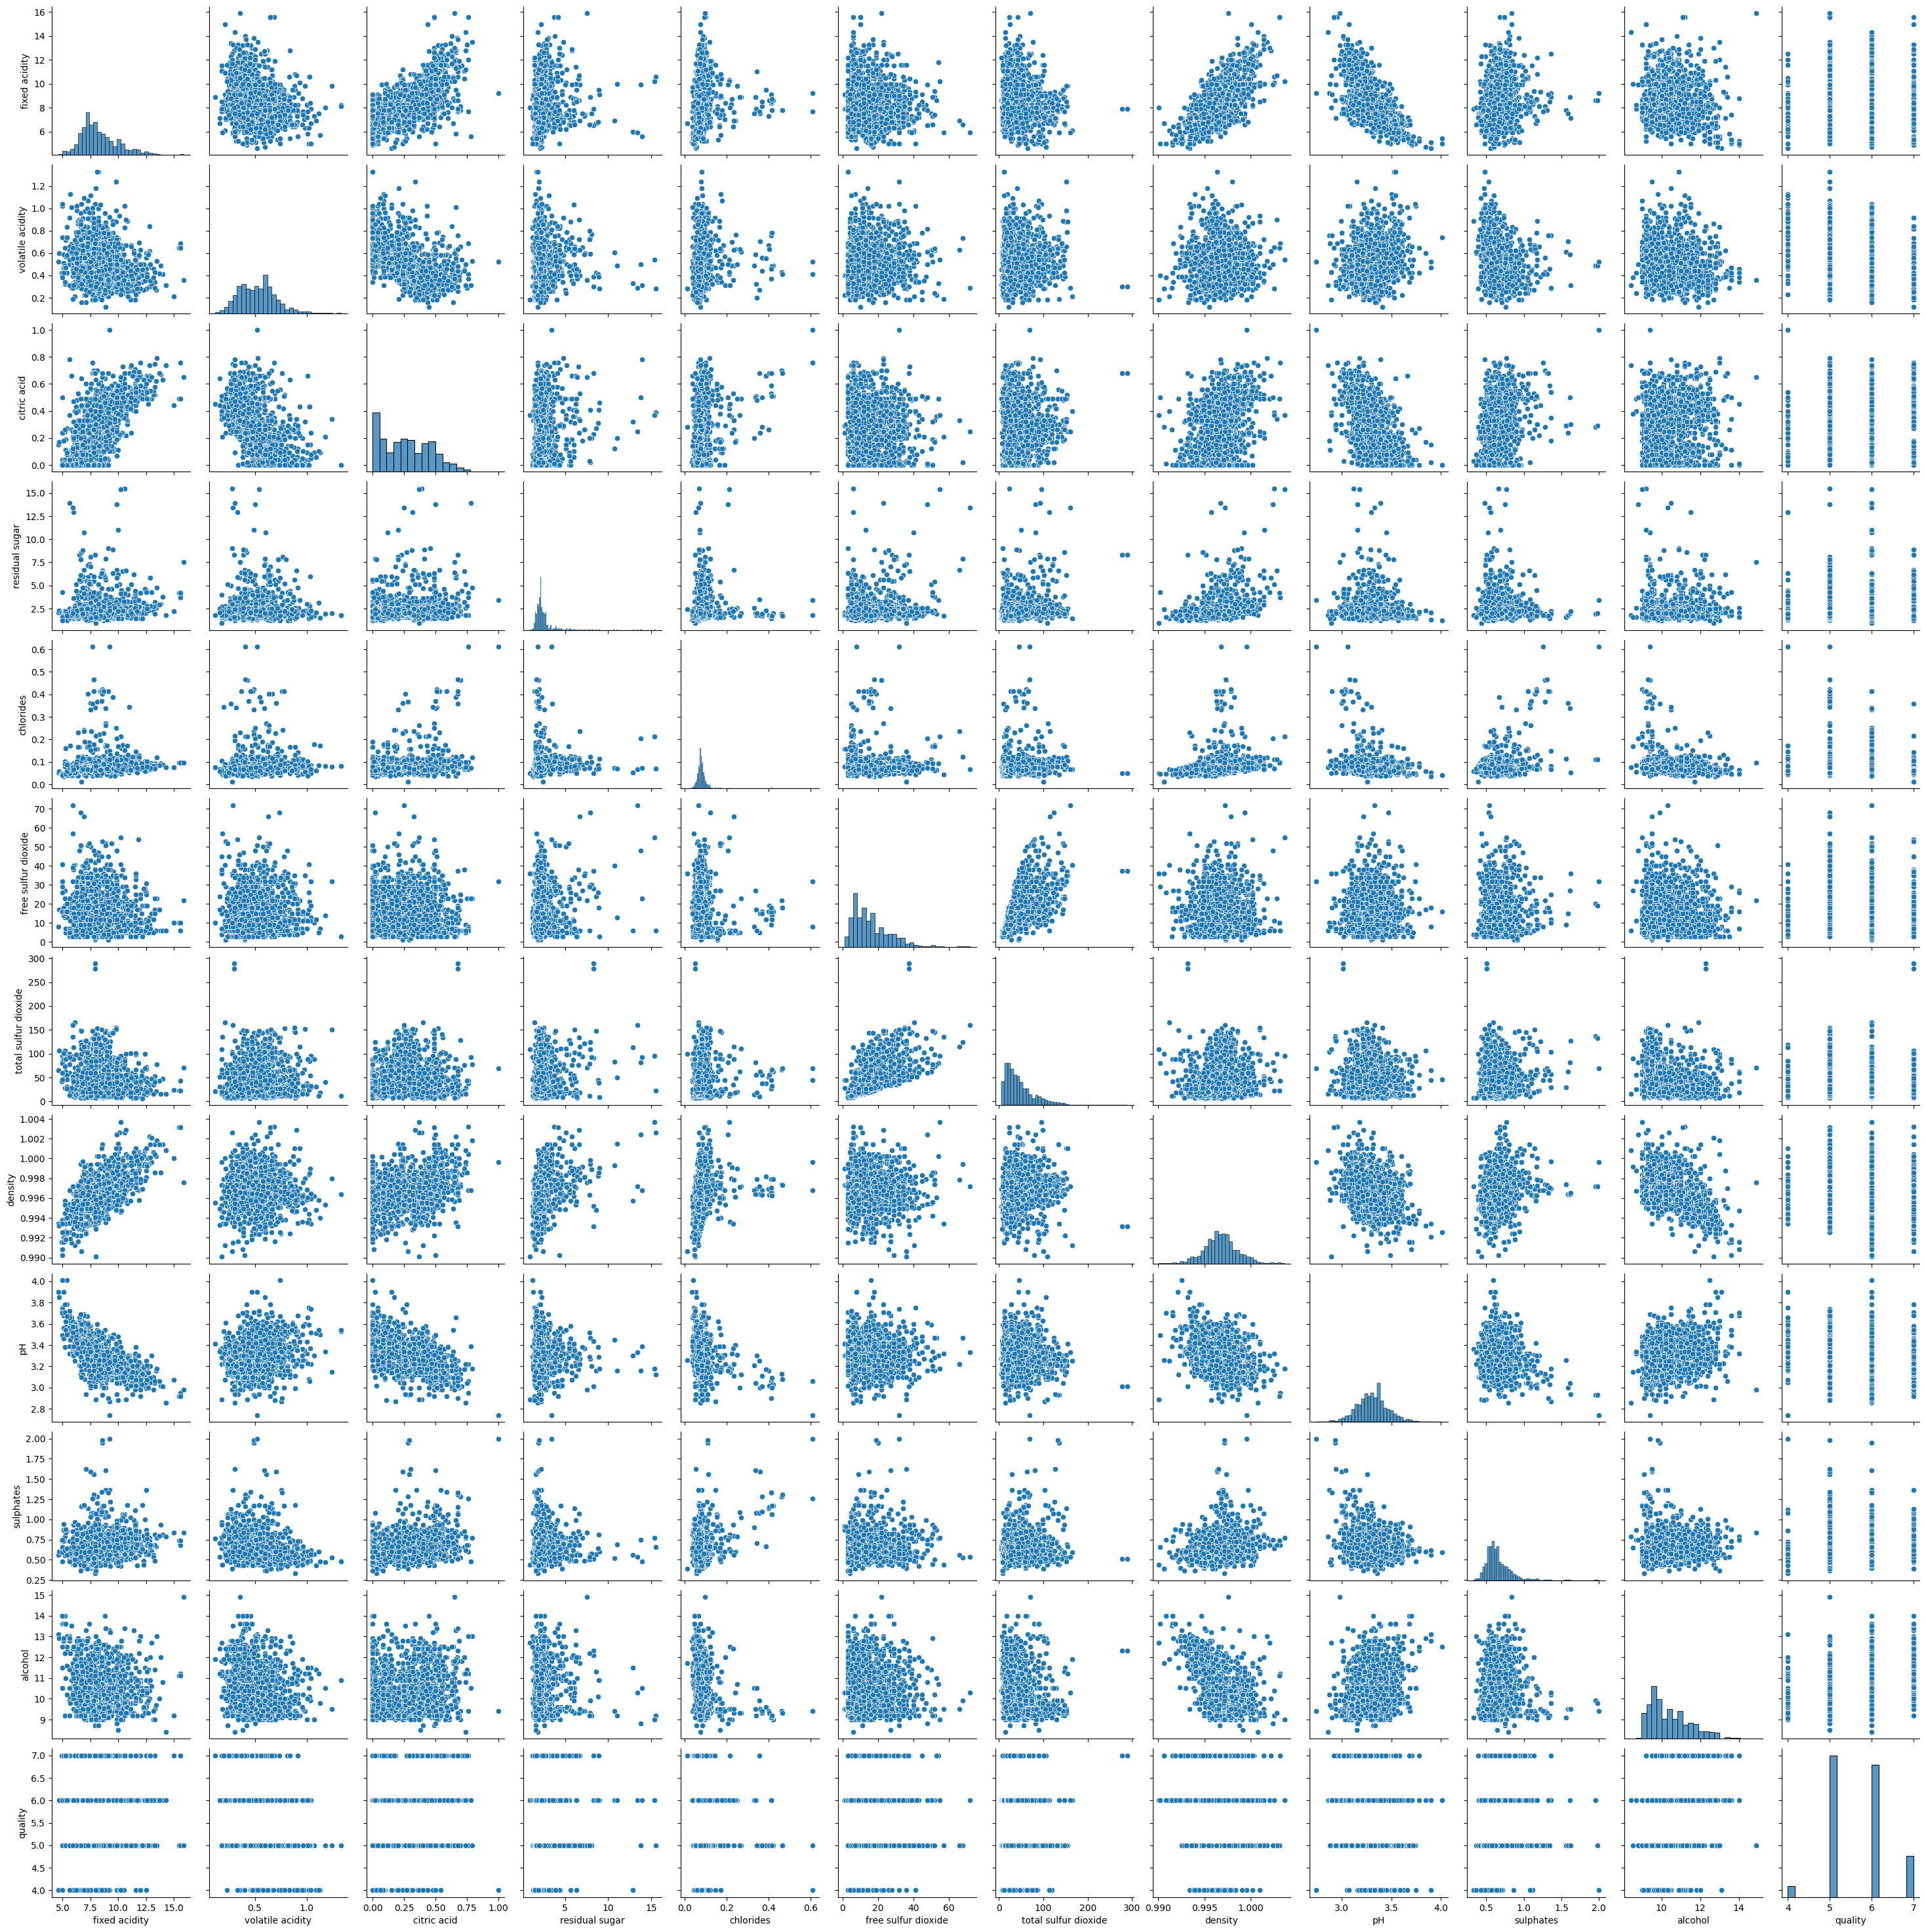

In [34]:
sns.pairplot(red_wine_no_emissions.iloc[:, :-1], diag_kind='hist')

In [35]:
corr = red_wine_no_emissions.corr()

<AxesSubplot: >

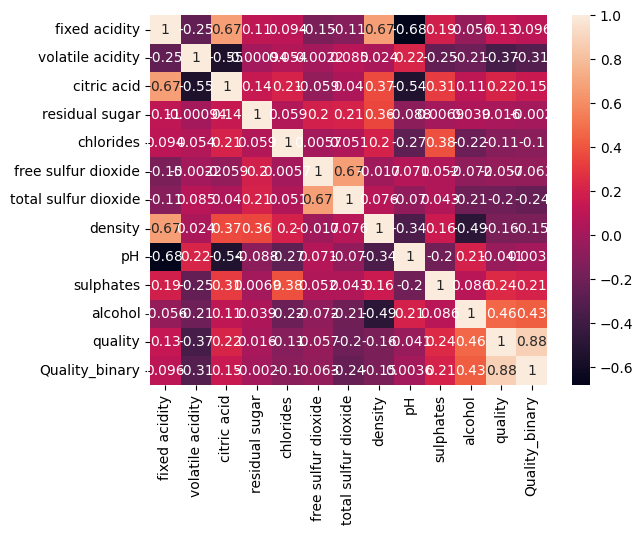

In [36]:
sns.heatmap(corr, annot=True)